# 1. Introduction

The Titanic dataset is one of the most famous datasets in data science.  
It contains details about passengers on the Titanic and whether they survived or not.  

🎯 In this notebook, my goal is to practice **Exploratory Data Analysis (EDA)**:
- Load and explore the dataset
- Check for missing values
- Visualize important patterns
- Write down clear insights in plain English

Why Titanic?  
Because it’s simple, well-known, and lets us tell a story with data —  
*Who had the best chance of survival?*


In [13]:
import pandas as pd

df = pd.read_csv("../data/raw/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Overview

Now that we’ve loaded the Titanic dataset, let’s take a first look.  
The goal here is to understand:
- How many rows and columns the dataset has  
- What kind of data each column contains  
- Whether there are missing values  
- A quick preview of the actual records


In [10]:
## Number of rows and columns
df.shape

(891, 12)

In [11]:
## What kind of data each column contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
## Quick stats for numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations
- The dataset has 891 rows (passengers) and 12 columns (features).  
- The `Survived` column is our target (0 = did not survive, 1 = survived).  
- `Age` and `Cabin` have missing values.  
- `PassengerId` is just an index, not useful for analysis.  


# 3. Exploratory Analysis

Now we’ll dig into the Titanic dataset to look for patterns.  

We’ll explore:
- How many passengers survived vs. not survived  
- Survival differences by gender  
- Survival differences by passenger class  
- Age distribution and its relationship with survival  

The goal is to tell a story:  
*Who had the best chance of survival on the Titanic?*


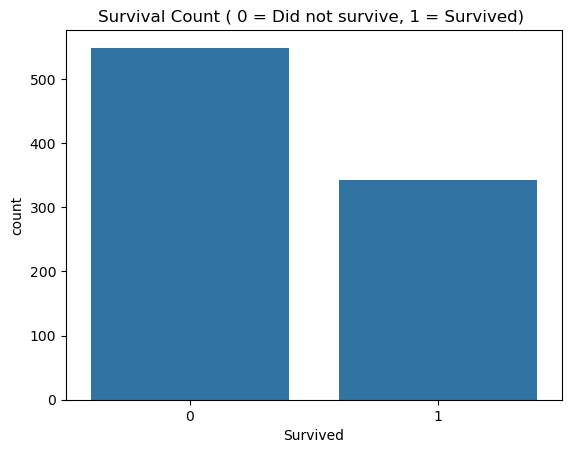

In [31]:
##How many passengers survived vs. not survived

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Survived")
plt.title("Survival Count ( 0 = Did not survive, 1 = Survived) ")
plt.savefig("../reports/figures/survival_.png", dpi=300, bbox_inches="tight")
plt.show()

### Observations
- About 2/3 of passengers did not survive.  
- Survival rate was roughly 38%.  


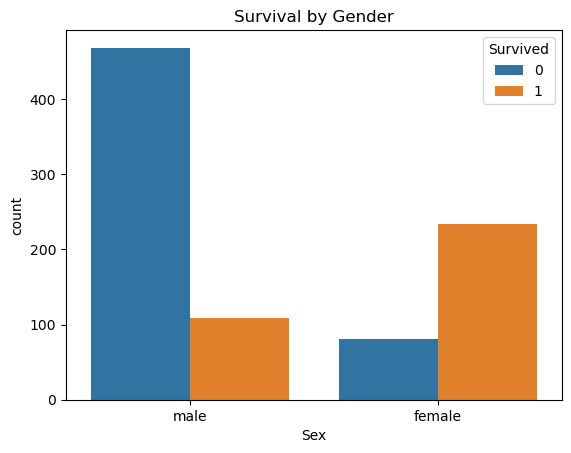

In [28]:
##Survival differences by gender

sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.savefig("../reports/figures/survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()

### Observations
- Women had a much higher survival rate than men.  
- This matches the "women and children first" historical story.  


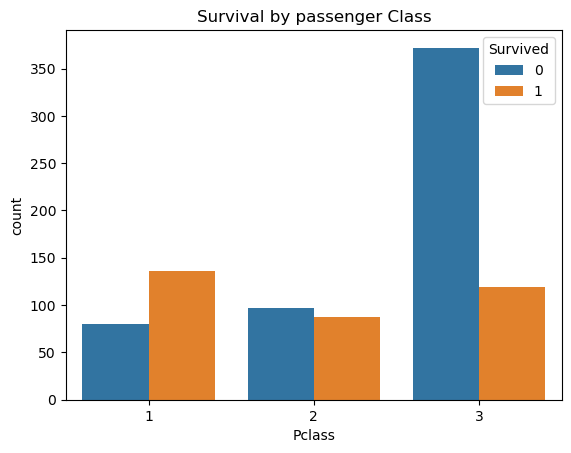

In [30]:
##Survival differences by passenger class

sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by passenger Class")
plt.savefig("../reports/figures/survival_by_passenger_class.png", dpi=300, bbox_inches="tight")
plt.show()

### Observations
- 1st class passengers had the highest survival rate.  
- 3rd class passengers had the lowest survival rate.  
- Wealth/social status clearly played a role.  


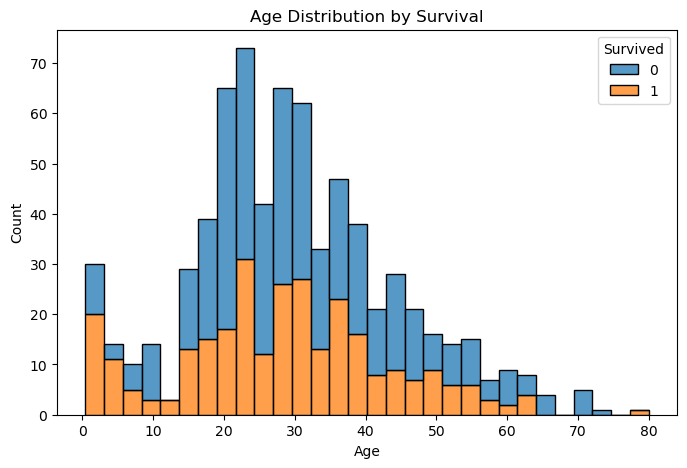

In [29]:
## Age distribution and its relationship with survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", bins=30, hue="Survived", multiple="stack")
plt.title("Age Distribution by Survival")
plt.savefig("../reports/figures/age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

### Observations
- Many passengers were between 20–40 years old.  
- Children had a higher chance of survival compared to adults.  


# 4. Insights & Wrap-Up

Here’s what we found from exploring the Titanic dataset:

- ❌ Most passengers did not survive (about 62%).  
- 👩 Women had a much higher survival rate than men.  
- 🛳️ Passengers in 1st class were more likely to survive, while 3rd class had the lowest survival.  
- 👶 Children had a higher chance of survival compared to adults.  

### Key Takeaway
Survival strongly depended on **gender, class, and age**.  
This matches the historical story of "women and children first" and the advantages of higher social class.

---

✅ This concludes the basic Exploratory Data Analysis (EDA).  
In future steps, this could be extended to:
- Predict survival with machine learning (e.g., logistic regression)  
- Explore family size, fare, and embarkation port  
- Build better visualizations and dashboards